In [2]:
# general imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

## Contents

* [Gather](#gather)
* [Assess](#assess)
* [Clean](#clean)
* [Analyze](#analyze)

# Data Investigations 

# Gather <a class="anchor" id="gather"></a>

## Gather 1: We Rate Dogs Twitter Archive

In [2]:
# turn the We Rate Dogs twitter archive into a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [9]:
# make a copy of the file
archive.to_csv('twitter-archive-enhanced-copy.csv', index=False)

In [10]:
# test that the copy worked
archive_copy = pd.read_csv('twitter-archive-enhanced-copy.csv')
archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Gather 2: Additional Twitter info via an API

In [3]:
# use Tweepy to create an API object to gather twitter info

# I am commenting these api sections out - I had to remove the keys, secrets and tokens. 
# So running these cells would result in an error.

'''
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

'''

In [4]:
# try extracting the full info for the first two tweets in the We Rate Dogs archive

# I am commenting these api sections out - I had to remove the keys, secrets and tokens. 
# So running these cells would result in an error.

'''
import json
count = 0
with open('tweet_json_test.txt', 'w') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet=api.get_status(tweet_id, tweet_mode='extended')
            print(str(tweet_id))
            print(f"Here is the complete tweet info: {tweet._json}")
            # put the tweet onto the working file
            json.dump(tweet._json, file)
            #create a new line beneath that tweet info
            file.write('\n')
        except tweepy.TweepError as e:
                  print('error')
                  pass
        count+=1
# break out of loop after looping through 2 tweet_id entries
        if count == 2:
            break

'''

892420643555336193
Here is the complete tweet info: {'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528

In [11]:
# see if you can turn the extract json info in the trial run into a dataframe

# I am commenting these api sections out - I had to remove the keys, secrets and tokens. 
# So running these cells would result in an error.

'''
df_test = pd.read_json('tweet_json_test.txt', lines=True)
df_test.head(1)
'''

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34639,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,False,en,NaN,False,False,7218,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [ ]:
#download the full tweets for the tweets we downloaded from We Rate Dogs

# I am commenting these api sections out - I had to remove the keys, secrets and tokens. 
# So running these cells would result in an error.

'''
import json
from time import time

start = time()
with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_archive['tweet_id']:
    
        try:
            tweet=api.get_status(tweet_id, tweet_mode='extended', 
                                 wait_on_rate_limit=True, wait_on_wait_limit_notifier=True)
                        # put the tweet onto the working file
            json.dump(tweet._json, file)
            #create a new line beneath that tweet info
            file.write('\n')
        except tweepy.TweepError as e:
                  print(f"error at tweet {tweet_id}")
                  pass
        
end = time()
print(f"Time to download: {end - start}")

'''

In [11]:
# create a dataframe of the full downloaded tweets
full_tweets = pd.read_json('tweet_json.txt', lines=True)
full_tweets.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7217,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30006,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5413,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22592,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3576,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37891,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7438,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
# make a copy of tweet_json.txt

full_tweets.to_csv('tweet_json_copy.csv', index=False)

In [14]:
# check the copy

copy_json = pd.read_csv('tweet_json_copy.csv')
copy_json.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7217,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Gather 3: Download tweet image predictions

In [11]:
# download the tweet images predictions programmatically from the udacity site

# import the requests library
import requests
# this is the url whose information we want to download
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# here we download the data held within that url
# requests.get returns the server's response
response = requests.get(predicted_breeds_url)
# the file within that url that we are opening is 
# at the end of the file name: image-predictions.tsv
# now we open that file as 'f' and write it in binary to 
# (the binary part is so what you write will not be encoded as text in the data)
with open('image_predictions.tsv', 'wb') as f:
# response.content returns the content of the response
# f.write(THIS) writes THIS
# so here we are writing the response content
    f.write(response.content)



In [16]:
# put the image_predictions data into a dataframe.
image = pd.read_csv("image_predictions.tsv", sep='\t')
# preview the image predictions data
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
# make a copy of image_predictions 

image.to_csv('image_predictions_copy.csv', index=False)
image_copy = pd.read_csv("image_predictions_copy.csv")
image_copy.head(1)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# Assess <a class="anchor" id="assess"></a>

## Assess 1: We Rate Dogs Twitter Archive

In [6]:
# head of We Rate Dogs twitter archive into a dataframe
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Conclusion: Some of the data types are wrong

### These are the data type issues:

1. tweet_id, in_reply_to_status_id, and in_reply_to_user_id, retweeted=status_id, & retweeted_status_user_id should be strings

2. timstamp & retweeted_status_timestamp should be in the timestamp data structure


### Conclusion: The dog stages (doggo, floofer, etc) are all one variable (one piece of data)

#### The three dog stages will have to be combined into one column

In [3]:
#check retweeted_status_timestamp format
mask=archive[archive.retweeted_status_timestamp.notnull()]
mask.retweeted_status_timestamp.head()

19    2017-07-19 00:47:34 +0000
32    2017-07-15 02:44:07 +0000
36    2017-02-12 01:04:29 +0000
68    2017-06-23 01:10:23 +0000
73    2017-06-23 16:00:04 +0000
Name: retweeted_status_timestamp, dtype: object

In [3]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
df_denom_elf = archive[archive['rating_denominator'] == 11]
df_denom_elf

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [33]:
df_denom_fifty = archive.query('rating_denominator == 50')
df_denom_fifty

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [16]:
df_denom_zero = archive.query('rating_denominator == 0')
df_denom_zero

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [6]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Conclusion: Some of these denominators and numerators are unconventional.

#### However, Udacity said that's part of the site's charm.

In [7]:
archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Rusty         6
Scout         6
Oscar         6
Koda          6
Jack          6
Stanley       6
Leo           6
Dave          6
Bella         6
Milo          6
Jax           6
Bentley       5
           ... 
Kellogg       1
Ralf          1
Apollo        1
Crouton       1
Karl          1
Lassie        1
Chevy         1
Bauer         1
Bowie         1
Biden         1
Pinot         1
Mike          1
Pawnd         1
Meera         1
Sundance      1
General       1
space         1
Billl         1
Arnold        1
Butters       1
Halo          1
Jennifur      1
Edmund        1
Harvey        1
Rodman        1
Amélie        1
Kramer        1
Kaia          1
Willow        1
Crumpet       1
Name: name, Length: 957,

In [17]:
# find all names that are lower cased
mask=archive['name'].str.islower()
archive.loc[mask, 'name']

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [28]:
#I can't see all the lowercase names. I want to see all.
# So I'll have to print them in chunks
mask=archive['name'].str.islower()
mask2 = archive.loc[mask, 'name'].reset_index()
mask2[:50]

,index,name
0,22,such
1,56,a
2,118,quite
3,169,quite
4,193,quite
5,335,not
6,369,one
7,542,incredibly
8,649,a
9,682,mad


In [29]:
mask2[50:109]

,index,name
50,1693,actually
51,1724,by
52,1737,a
53,1747,officially
54,1785,a
55,1797,the
56,1815,the
57,1853,a
58,1854,a
59,1877,a


In [23]:
# examine the row with the dog named 'incredibly'
incredibly = archive.loc[542]
incredibly

tweet_id                                                     806219024703037440
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-12-06 19:29:28 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          We only rate dogs. Please stop sending in non-...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/806219024...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

### Conclusion: The lowercase dog names are not names at all, but other sorts of words

#### We will have to remove the lowercase dog (not-)names.

In [10]:
mask = (archive['name'].str.len() < 4) & (~(archive['name'].str.islower()))
archive.loc[mask, 'name']

6       Jax
13      Ted
16      Jim
49      Gus
53      Rey
77      Aja
92      Jed
217     Leo
266     Ken
270     Max
304     Ava
308     Eli
311     Ash
319     Leo
360     Mia
361     Leo
366     Gus
392     Ike
393      Mo
446      Bo
449      Bo
454     Tom
463     Ken
486     Alf
491     Sky
503     Tyr
510     Moe
511     Ted
516     Sam
520     Gus
       ... 
1683     Bo
1741    Evy
1755    Tug
1756    Mia
1809    Ash
1879    Moe
1899    Jeb
1909    Ava
1919    Bob
1921    Gus
1946    Dot
1970    Eve
1971    Mac
1988     Ed
1996    Taz
2014    Cal
2027    Mia
2041     JD
2045    Jax
2050    Pip
2057    Lou
2078    Amy
2096    Gin
2106    Edd
2114    Sam
2137    Ben
2168    Dug
2219     Jo
2233    Ron
2245    Stu
Name: name, Length: 96, dtype: object

### Conclusion: I don't see an obvious problem with short dog names

In [8]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
#look at rows containing 'puppo'?
df_floofer = archive[archive.puppo != "None"]
df_floofer.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo


In [11]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
# are any of the values in "puppo" misspelled?
puppo_error = archive.query('(puppo!="None") and (puppo!="puppo")')

In [10]:
# do any of the tweets have more than one dog stage?
# Create a mask that hones in on the dog. 
# The mask replaces all "None" values with NaN; 
# And then drops any row with less than three NaNs.
# That leaves only those values with more than one dog status
mask=archive[['doggo', 'puppo', 'pupper', 'floofer']].apply(lambda x: x.replace("None", np.nan)).dropna(thresh=2).index
archive.loc[mask,['tweet_id','doggo', 'puppo', 'pupper', 'floofer']]

,tweet_id,doggo,puppo,pupper,floofer
191,855851453814013952,doggo,puppo,None,None
200,854010172552949760,doggo,None,None,floofer
460,817777686764523521,doggo,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,doggo,None,pupper,None
705,785639753186217984,doggo,None,pupper,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None


We can use the tweet_id with https://twitter.com/dog_rates/status/ to inspect each tweet to see if there's a reason why there should be more than one dog status.

855851453814013952 - This is called a "puppo" (with a "doggo" agenda).
854010172552949760 - This is a "doggo" that the narrator jokingly calls a "rare Canadian floofer owl". It is not an owl.
817777686764523521 - This is described as a "pupper"
808106460588765185 - A pupper and a doggo
802265048156610565 - A pupper and a doggo
801115127852503040 - I believe this s a pupper; and the "doggo" reference is more intrinsic to the tweet's joke than to it's subject's dog status.
785639753186217984 - This is a hedgehog
781308096455073793 - doggo and puppo
775898661951791106 - doggo and puppo
770093767776997377 - doggo and pupper
759793422261743616 - doggo and pupper
751583847268179968 - doggo that blends into the sofa
741067306818797568 - pupper and doggo
733109485275860992 - doggo and pupper

In [12]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

### Conclusion: Some of the rows with more than one dog stage should only report one dog stage (since the picture is of one dog at one stage in life)

#### We will have to address this issue on a case-by-case basis

## Assess 2: Additional Info Downloaded via API

In [7]:
# head of dataframe of the full downloaded tweets
full_tweets = pd.read_json('tweet_json.txt', lines=True)
full_tweets.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7217,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30006,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5413,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22592,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3576,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37891,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7438,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
full_tweets.iloc[0].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [6]:
full_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null float64
id                               2326 non-null int64
id_str                           2326 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

### Conclusion: Some of these datatypes are wrong

#### id, id_str, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, & in_reply_to_user_id_str should all be in the string data-type

In [15]:
full_tweets.retweet_count.value_counts()

580      5
576      5
651      5
65       4
916      4
643      4
488      4
1179     4
638      4
2227     4
426      4
429      4
49       4
211      4
5245     4
118      4
475      4
494      4
1159     4
347      4
79       4
197      4
87       4
674      3
883      3
1806     3
189      3
545      3
254      3
171      3
        ..
2440     1
393      1
2444     1
8595     1
407      1
421      1
31148    1
2478     1
365      1
2406     1
315      1
6500     1
2364     1
317      1
596      1
2368     1
321      1
2374     1
327      1
527      1
329      1
337      1
339      1
12631    1
345      1
202      1
788      1
2398     1
355      1
2020     1
Name: retweet_count, Length: 1660, dtype: int64

In [22]:
#full_tweets.retweeted_status.value_counts()
full_tweets.retweeted_status.dropna().head()

31    {'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
35    {'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
67    {'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
72    {'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
73    {'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
Name: retweeted_status, dtype: object

These were the tweet_ids with errors:

error at tweet 888202515573088257
error at tweet 873697596434513921
error at tweet 872668790621863937
error at tweet 872261713294495745
error at tweet 869988702071779329
error at tweet 866816280283807744
error at tweet 861769973181624320
error at tweet 856602993587888130
error at tweet 856330835276025856
error at tweet 851953902622658560
error at tweet 845459076796616705
error at tweet 844704788403113984
error at tweet 842892208864923648
error at tweet 837366284874571778
error at tweet 837012587749474308
error at tweet 829374341691346946
error at tweet 827228250799742977
error at tweet 812747805718642688
error at tweet 805207613751304193
error at tweet 802247111496568832
error at tweet 779123168116150273
error at tweet 775096608509886464
error at tweet 771004394259247104
error at tweet 770743923962707968
error at tweet 766864461642756096
error at tweet 759923798737051648
error at tweet 759566828574212096
error at tweet 754011816964026368
error at tweet 695816827381944320
error at tweet 680055455951884288

In [19]:
full_tweets.retweeted.value_counts()

False    2326
Name: retweeted, dtype: int64

In [26]:
# check to make sure there are no retweets in the dataframe
full_tweets["is_quote_status"].value_counts()

False    2295
True       31
Name: is_quote_status, dtype: int64

### Conclusion: There are retweets

#### We will have to remove the retweets

## Assess 3: Image Predictions

In [8]:
# put the image_predictions data into a dataframe.
image = pd.read_csv("image_predictions.tsv", sep='\t')
# preview the image predictions data
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Conclusion: One datatype is wrong

#### tweet_id should be a string

In [16]:
#checking to see if all dog names are capitalized or not (nope)
# and to see if all the names are dogs (nope)
p1_unique = image.p1.unique()
p1_unique

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

### Conclusion: Some of the dog breed names are capitalized and others are lowercase

#### We will have to make all the dog breed name capitalizations uniform

## Assess 4: Comparing dataframes

In [9]:
all_columns = pd.Series(list(archive) + list(full_tweets) + list(image))
all_columns[all_columns.duplicated()]

30    in_reply_to_status_id
32      in_reply_to_user_id
46                   source
49                 tweet_id
dtype: object

In [15]:
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
full_tweets[full_tweets.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


### Conclusion: Some column names are duplicated across the data frames.

#### Udacity said this is not a wrangling issue. So I will have to leave it alone for now.

In [12]:
# I want to compare id and id_str in full_tweets (this cell)
# with tweet_id in archive (next cell)
ft_ids = full_tweets[['id', 'id_str']]
ft_ids.head()

,id,id_str
0,892420643555336193,892420643555336192
1,892177421306343426,892177421306343424
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256


In [14]:
arc_id = archive['tweet_id']
arc_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

## Assess 5: Overview of Issues Found & Cleaning Plan

## Plan for “We Rate Dogs” Data Cleaning

I am working with three data frames:

archive was given to Udacity by “We Rate Dogs”. It contains tweets, and programmatically harvested info (dog name, and dog stage [‘puppo’, ‘doggo’, etc. nonsense])

full_tweets we downloaded from “We Rate Dogs” using Tweepy. It contains additional information about the tweets in archive. For example, full_tweets includes the number of times a tweet was retweeted or favorited.

image was created by Udacity. They used image processing software to label the dogs in the pictures (top three guesses of the image processing software.

My analysis will focus on how dog stage and dog breed correspond to how many times a tweet was favorited or retweeted.

## Missing Data

There are missing values in several columns in archive and full_tweets, but I don’t know how to find them, and they are not columns that I plan on analyzing. So I will ignore that issue.

## Tidiness Issues

1. The tweet ids are called “tweet_id” in the archive and image dataframes, but ‘id’ in the full_tweets dataframe.
Solution: I will change the ‘id’ column name to ‘tweet_id’ in full_tweets.

2. The information about dog stages should be in one column, not spread out in four columns (since dog stage is one variable (one piece of data)).
Solution: Combine the four dog stage columns into one column called dog_stage.
{There are some rows that have more than one dog stage. 
In Quality step #6 I go through all 14 rows with more than one dog status. After that process, there are still some rows that retain either both “doggo” and “pupper” or “doggo” and “puppo”, but no other combinations (ex: no rows with “doggo” and “floofer”).}

3. Both archive and image contain descriptive information about the dogs in the tweets. 
Solution: Join the archive and image dataframe. I’ll put the archive info on the left and the image info on the right. 


## Quality Issues

1. Some of the names (archive) are clearly wrong. Like “a”, “an”, “the” ...
Solution: I looked at all the lowercase “names” and confirmed that all 109 of them were not names, but normal words that the algorithm mistook for names. I’ll replace all lowercase “names” with the value “Unknown”.

2, The time_stamp column (archive) is not in the datetime data type format.
Solution: I am going to be deleting that column from archive anyway (see step #2 in tidiness).

3. The values in the retweeted_status_timestamp column (archive) are objects, not timestamps (wrong data type). 
Also: The retweeted_status_timestamp (archive) values are written with an extra +0000 at the end, while the created_at values are written like this 2017-08-01 16:23:56 (without the +0000)
Solution: I will the retweeted_status_timestamp column’s values to timestamp with the default format, which matches to format of created_at. This will also automatically remove the +0000 from retweeted_status_timestamp.

4. Some of the column names in archive are repeated but with different names in full_tweets. 
Specifically: text (archive) / full_text (full_tweets) and timestamp (archive) / created_at (full_tweets)
Solution: We are already deleting those two columns from the archive dataframe (see step 2 in tidiness).
Some of the dog breeds (images) are capitalized and others aren’t.
Solution: I will make all dog breeds lowercase.

5. Tweet_id, retweeted_status_id and retweeted_status_user_id are stored as an integer, but the id numbers are used only for categorization, not for studying mathematical relationships.
Solution: I will change those data types to strings.
14 of the rows (archive) are labelled with more than one dog stage. I went through them and found that six of those double-labels should be a single label. [See end of this page for details on all 14 rows.]

6. There are 12 doggo, pupper rows
And one doggo, puppo row
And one doggo, floofer row
Solution: I will make the following changes:
855851453814013952 - change from "doggo, puppo" to “puppo”.
854010172552949760 - change from “doggo, floofer” to “doggo“
817777686764523521 - change from "doggo, pupper" to “pupper”
801115127852503040 - change from “doggo, pupper” to “pupper”
785639753186217984 - change from “doggo, pupper” to an empty string (this is a hedgehog!)
751583847268179968 - change “doggo, pupper” to “doggo”.

7. Some of the column names in archive are repeated but with different names in full_tweets. 
Specifically: text (archive) /  (full_tweets) and timestamp (archive) / created_at (full_tweets)
Solution: We are already deleting those two columns from the archive dataframe (see step 2 in tidiness).

8. 31 of the tweets in full_tweets are quotes. Quotes aren’t supposed to be included in the data. 
Solution: We will delete the quotes.


## Post-Cleaning Cleaning

I am not permitted to label the following two issues either "tidiness" or "quality" and will thus have to wait until the dataframes are cleaned before I can address them.

This is not my will. I hate these two issues and would have purged all dataframes (terrestial or otherwise) of them aeons ago, were it permitted.

1. The tweet ids are called “tweet_id” in the archive and image dataframes, but ‘id’ in the full_tweets dataframe.
Solution: I will change the ‘id’ column name to ‘tweet_id’ in full_tweets.

2. Several columns are repeated in archive and full_tweets. 
Specifically:  in_reply_to_status_id, in_reply_to_user_id, source, tweet_id, and text (archive) / full_text (full_tweets) and timestamp (archive) / created_at (full_tweets)
Solution: Except for tweet_id, those columns are redundant. So I will remove them from the smaller dataframe (archive).




## Rows with more than one dog status (archive)

We used the tweet_id with https://twitter.com/dog_rates/status/ to inspect each tweet to see if there's a reason why there should be more than one dog status.

855851453814013952 - This is called a "puppo" (with a "doggo" agenda). (we need to get rid of the “doggo” part)
854010172552949760 - This is a "doggo" that the narrator jokingly calls a "rare Canadian floofer owl". It is not an owl. (we need to get rid of the ‘floofer’ part).
817777686764523521 - This is described as a "pupper" (we need to get rid of the “doggo” part)
808106460588765185 - A pupper and a doggo
802265048156610565 - A pupper and a doggo
801115127852503040 - I believe this is a pupper; and the "doggo" reference is more intrinsic to the tweet's joke than to it's subject's dog status. (we need to get rid of the “doggo” part)
785639753186217984 - This is a hedgehog
781308096455073793 - doggo and puppo
775898661951791106 - doggo and puppo
770093767776997377 - doggo and pupper
759793422261743616 - doggo and pupper
751583847268179968 - doggo that blends into the sofa (get rid of pupper part)
741067306818797568 - pupper and doggo
733109485275860992 - doggo and pupper

# Clean <a class="anchor" id="clean"></a>

# Please skip down 5 cells
# to "Recreate all the dataframes ... "

In [4]:
#change 'id' column name to 'tweet_id' in the full_tweets dataframe
# this is step 1 in the Tidiness plan
#full_tweets_clean = full_tweets.rename({'id': 'tweet_id'}, axis=1)

In [6]:
#check to see that the column name has been changed
#full_tweets_clean.tweet_id.head(1)

0    892420643555336193
Name: tweet_id, dtype: int64

In [7]:
#full_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null float64
tweet_id                         2326 non-null int64
id_str                           2326 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [10]:
#full_tweets_clean.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
tweet_id                                  int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [7]:
# delete from archive the columns that are in both archive and full_tweets
# this is step 2 in the Tidiness plan
#archive_clean = archive.drop(["text", "timestamp", "in_reply_to_status_id", "in_reply_to_user_id", "source"], axis=1)
#archive_clean.head()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Recreate all the dataframes for the tidiness phase

In [3]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
archive_clean = archive.copy()
archive_clean.to_csv('archive_clean_copy.csv', index=False)

In [5]:
full_tweets = pd.read_json('tweet_json.txt', lines=True)
full_tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [6]:
full_tweets_clean = full_tweets.copy()
full_tweets_clean.to_csv('full_tweets_clean_copy.csv', index=False)

In [7]:
image = pd.read_csv("image_predictions.tsv", sep='\t')
# preview the image predictions data
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [8]:
image_clean = image.copy()
image_clean.to_csv('image_clean_copy.csv', index=False)

### Tidiness Issue 1 - dog stages in multiple columns

Define: In the archive dataframe, the information about dog stages should be in one column, not spread out in four columns (since dog stage is one variable (one piece of data)).

Solution: Combine the four dog stage columns into one column called dog_stage and then drop the doggo, puppo, pupper, and floofer columns from the dataframe. 

Rows that had originally had more than one dog stage will now have smooshed-together entries like "doggopuppo". We will use .loc to redefine those entries with comma-separated values like "doggo, puppo".

### Tidiness Issue 1 - Code

In [9]:
# combine the four doggo status columns into one column called dog_stage
# this is step three in Tidiness

# replace None in stage columns with empty string

archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)

# combine the four dog stage columns into one column titled dog_stage

archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.pupper + archive_clean.puppo + archive_clean.floofer

archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,


In [8]:
# ignore this cell from a previous iteration

# combine the four doggo status columns into one column called dog_stage
# this is step three in Tidiness

# replace None in stage columns with empty string
'''
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)

# combine the four dog stage columns into one column titled dog_stage

archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.pupper + archive_clean.puppo + archive_clean.floofer

archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1)

archive_clean.head()
'''

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [10]:
# drop the doggo, floofer, pupper, and puppo columns
archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


In [11]:
archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [11]:
# rows that had more than one dog status were smooshed-together
# like doggopuppo or doggopupper
# now we break those smooshed-together entries into comma-separated entries

archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
archive_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

## Tidiness Issue 1 - Test

In [12]:
# make sure the individual dog-stage headings have been removed
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


In [13]:
# check the values in the new dog_stage column
archive_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Tidiness Issue 2 - archive and image dataframes should be merged

Define: Both archive and image contain descriptive information about the dogs in the tweets. 

Solution: Join the archive and image dataframe. I’ll put the archive info on the left and the image info on the right.

### Tidiness Issue 2 - Code

In [14]:
# combine the archive and image dataframes, with archive on the left and image on the right
combined = pd.merge(archive_clean, image_clean, how='inner')

## Tidiness Issue 2 - Check

In [15]:
# check head of combined dataframe
combined.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [16]:
# look at all the column headings of combined dataframe
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   2075 

In [17]:
combined.to_csv('combined.csv', index=False)

In [18]:
combined = pd.read_csv('combined.csv')

In [19]:
# name combined as combined_clean, since I am on the cleaning step now
combined_clean = combined.copy()

In [20]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   321 n

### Note: See my Wrangle Report for why I don't believe the full_tweets data frame should be combined with the other two.

Short Answer: full_tweets is primarily numerical data about the tweets themselves (time posted, number of retweets, etc).

The unique data in the other two data frames are descriptions about the dogs discussed in the tweets that were programatically extracted from the tweets. 

I feel these are two separate categories of data and so should not be combined during the cleaning phase.

### Quality Issue 1 - Wrong names

Define: Some of the names (archive) were clearly wrong. Like “a”, “an”, “the” ...

Solution: I used .str.islower() with .loc in the analysis section to examine all the lowercase “names” and confirm that all 109 of them were not names, but normal words that the algorithm mistook for names. Now I'll replace all lowercase “names” with “” (ie: nothing) using .replace()


### Quality Issue 1 - Code

In [21]:
# drop all the lower case names in combined_clean
combined_clean = combined_clean[combined_clean.name.str.istitle()]

### Quality Issue 1 - Check

In [22]:
# check to make sure there are no more lower case names
combined_clean[combined_clean.name.str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
# no lower class names appeared; let's check to see how our name category's count changed

combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1969 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1969 non-null   object 
 4   source                      1969 non-null   object 
 5   text                        1969 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               1969 non-null   object 
 10  rating_numerator            1969 non-null   int64  
 11  rating_denominator          1969 non-null   int64  
 12  name                        1969 non-null   object 
 13  dog_stage                   308 n

### Quality Issue 2 - timestamp columns should be in the datetime data type

Define: The timestamp and retweeted_stauts_timestamp columns (originally in the archive dataframe, now in the combined_clean dataframe) aren’t in the datetime data type format.

Solution: Change those columns' values to timestamp using .todatetime()

### Quality Issue 2 - Code

In [24]:
# change the timestamp data format to timestamp

combined_clean['timestamp'] = pd.to_datetime(combined_clean.timestamp)

In [25]:
# change the retweeted_status_timestamp data format to timestamp
# this is the third item (and second actionable item) in the Quality plan
combined_clean['retweeted_status_timestamp'] = pd.to_datetime(combined_clean.retweeted_status_timestamp)

### Quality Issue 2 - Check 

Confirm that both columns are now in the timestamp data type

In [26]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1969 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1969 non-null   datetime64[ns, UTC]
 4   source                      1969 non-null   object             
 5   text                        1969 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               1969 non-null   object             
 10  rating_numerator            1969 non-null   int64           

### Quality Issue 3 - the content of the two timestamp columns are in different formats

Define: The timestamp and retweeted_status_timestamp columns had an extra +0000 at the end, while the created_at columns (full_tweets) are written like this 2017-08-01 16:23:56 (without the +0000).

### Quality Issue 3 - Code

Both timestamp formats should be identical now that we've applied .to_date_time() to them.

### Quality Issue 3 - Check

In [27]:
# check timestamp and retweeted_status_timestamp 
# to confirm they both have the same formtats
combined_clean[['timestamp', 'retweeted_status_timestamp']].head(1)

,timestamp,retweeted_status_timestamp
0,2017-08-01 16:23:56+00:00,NaT


In [28]:
combined_clean[~combined_clean['retweeted_status_timestamp'].isna()].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,...,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


### Quality Issue 4 - inconsistent capitalization with dog breeds

Define: Some of the dog breeds (originally in the images dataframe) were capitalized and others weren’t.

Solution: Make all dog breeds lowercase with .apply(lambda x: x.str.lower(), axis=1)

### Quality Issue 4 - Code

In [29]:
# make all the dog breed names lower case
combined_clean[["p1", "p2", "p3"]] = combined_clean[["p1", "p2", "p3"]].apply(lambda x: x.str.lower(), axis=1)
combined_clean[["p1", "p2", "p3"]]

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
...,...,...,...
2061,pug,bull_mastiff,french_bulldog
2062,walker_hound,english_foxhound,ibizan_hound
2063,gordon_setter,yorkshire_terrier,pekinese
2070,miniature_pinscher,rottweiler,doberman


## Quality Issue 4 - Check

In [30]:
# make sure that all the dog breed names are lower case
# we will start with p1 and then do p2 and p3
# the dataframes should be empty
combined_clean[combined_clean.p1.str.islower() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
combined_clean[combined_clean.p2.str.islower() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
combined_clean[combined_clean.p3.str.islower() == False]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Quality Issue 5 - Define

Issue: Tweet_id, retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, and in_reply_to_user_id were stored as integers.

Solution: Change those data types to strings with .astype(str)

## Quality Issue 5 - Code

In [33]:
# change the tweet_id, retweeted_status_id, and retweeted_status_user_id
# data types from integer to string

combined_clean['tweet_id'] = combined_clean['tweet_id'].astype(str)
combined_clean['retweeted_status_id'] = combined_clean['retweeted_status_id'].astype(str)
combined_clean['retweeted_status_user_id'] = combined_clean['retweeted_status_user_id'].astype(str)
combined_clean['in_reply_to_status_id'] = combined_clean['in_reply_to_status_id'].astype(str)
combined_clean['in_reply_to_user_id'] = combined_clean['in_reply_to_user_id'].astype(str)

## Quality Issue 5 - Check

In [34]:
# check the datatypes of ids

combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1969 non-null   object             
 1   in_reply_to_status_id       1969 non-null   object             
 2   in_reply_to_user_id         1969 non-null   object             
 3   timestamp                   1969 non-null   datetime64[ns, UTC]
 4   source                      1969 non-null   object             
 5   text                        1969 non-null   object             
 6   retweeted_status_id         1969 non-null   object             
 7   retweeted_status_user_id    1969 non-null   object             
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               1969 non-null   object             
 10  rating_numerator            1969 non-null   int64           

### Quality Issue 6 - some rows have more than one dog stage

Define: 14 of the rows (originally in the archive dataframe) were labelled with more than one dog stage.  

This was discovered in the Assess section with the following code:

mask=archive[['doggo', 'puppo', 'pupper', 'floofer']].apply(lambda x: x.replace("None", np.nan)).dropna(thresh=2).index
archive.loc[mask,['tweet_id','doggo', 'puppo', 'pupper', 'floofer']]

I went through all 14 rows one by one and found that six of those double-labels should be a single label.

There were 12 doggo, pupper rows
And one doggo, puppo row
And one doggo, floofer row

Solution: Change each with a change list, a mask, and .loc, along with .str.replace and .str.strip


In [35]:
# to check the 14 rows, I used the below code with each row's index 
# (discovered in the Assess step)
# and then took used the link in the expanded_urls column to 
# check out the full text of the tweet.
combined_clean.loc[combined_clean['tweet_id']=='855851453814013952']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
155,855851453814013952,nan,nan,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,nan,nan,NaT,https://twitter.com/dog_rates/status/855851453...,...,1,flat-coated_retriever,0.321676,True,labrador_retriever,0.115138,True,groenendael,0.0961,True


After reviewing the fourteen cells that contained more than one dog status, I decided upon the following changes:

855851453814013952 - change from "doggo, puppo" to “puppo”

854010172552949760 - change from “doggo, floofer” to “doggo“

817777686764523521 - change from "doggo, pupper" to “pupper”

801115127852503040 - change from “doggo, pupper” to “pupper”

785639753186217984 - change from “doggo, pupper” to an empty string (this is a hedgehog!)

751583847268179968 - change “doggo, pupper” to “doggo”.

I will make each change individually.


### Quality Issue 6 - Code & Check

I broke this into several steps and checked each as I went.

In [36]:
# doggo, pupper becomes three different values
# but doggo, floofer and doggo, puppo become doggo and puppo, respectively
# doggo, pupper becomes pupper twice, so I will first address those 
# rows along with the doggo, floofer and doggo, puppo rows.
# And then come back to the more unusual doggo, pupper rows
change_list = ["855851453814013952", 
               "817777686764523521",
               "801115127852503040",
              "854010172552949760",
              ]

# gather those four rows
mask = combined_clean['tweet_id'].isin(change_list)

# change the doggo, puppo value to puppo 
combined_clean.loc[mask, 'dog_stage'] = combined_clean.loc[mask, 'dog_stage'].str.replace('doggo, puppo', 'puppo').str.strip()
combined_clean.loc[mask, ['tweet_id', 'dog_stage']]


,tweet_id,dog_stage
155,855851453814013952,puppo
161,854010172552949760,"doggo, floofer"
367,817777686764523521,"doggo, pupper"
465,801115127852503040,"doggo, pupper"


In [37]:
# change the doggo, floofer value to doggo
combined_clean.loc[mask, 'dog_stage'] = combined_clean.loc[mask, 'dog_stage'].str.replace('doggo, floofer', 'doggo').str.strip()
combined_clean.loc[mask, ['tweet_id', 'dog_stage']]

,tweet_id,dog_stage
155,855851453814013952,puppo
161,854010172552949760,doggo
367,817777686764523521,"doggo, pupper"
465,801115127852503040,"doggo, pupper"


In [38]:
# chage doggo,pupper to pupper
combined_clean.loc[mask, 'dog_stage'] = combined_clean.loc[mask, 'dog_stage'].str.replace('doggo, pupper', 'pupper').str.strip()
combined_clean.loc[mask, ['tweet_id', 'dog_stage']]

,tweet_id,dog_stage
155,855851453814013952,puppo
161,854010172552949760,doggo
367,817777686764523521,pupper
465,801115127852503040,pupper


In [39]:
# now do the two special cases
# 785639753186217984 - change from “doggo, pupper” to an empty string 
# 751583847268179968 - change “doggo, pupper” to “doggo”

special1 = ["785639753186217984"]
m1 = combined_clean['tweet_id'].isin(special1)
combined_clean.loc[m1, 'dog_stage'] = combined_clean.loc[m1, 'dog_stage'].str.replace('doggo, pupper', '').str.strip()
combined_clean.loc[m1, ['tweet_id', 'dog_stage']]

,tweet_id,dog_stage
567,785639753186217984,


In [40]:
special2 = ["751583847268179968"]
m2 = combined_clean['tweet_id'].isin(special2)
combined_clean.loc[m2, 'dog_stage'] = combined_clean.loc[m2, 'dog_stage'].str.replace('doggo, pupper', 'doggo').str.strip()
combined_clean.loc[m2, ['tweet_id', 'dog_stage']]

,tweet_id,dog_stage
782,751583847268179968,doggo


### Quality Issue 7 - some tweets are quotes

Define: 31 of the tweets in full_tweets are quotes. Quotes aren’t supposed to be included in the data. 

Solution: Save only those rows where "is_quote_status"=False

In [5]:
# reconstituting ftc to make changes to
full_tweets_clean = pd.read_csv('full_tweets_clean_copy.csv')

### Quality Issue 7 - Code

In [41]:
# this is the problem:
full_tweets_clean["is_quote_status"].value_counts()

False    2295
True       31
Name: is_quote_status, dtype: int64

In [42]:
# this is the solution:
full_tweets_clean = full_tweets_clean[full_tweets_clean["is_quote_status"]==False]
full_tweets_clean["is_quote_status"].value_counts()

False    2295
Name: is_quote_status, dtype: int64

### Quality Issue 7 - Check

In [43]:
full_tweets_clean["is_quote_status"].value_counts()

False    2295
Name: is_quote_status, dtype: int64

### Quality Issue 8 - id columns in full_tweets are not in string data type

Define: In the full_tweets_clean dataframe, id, id_str, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id,  in_reply_to_user_id_str, quoted_status_id, and quoted_status_id_str should all be in the string data type.

In [49]:
full_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2295 non-null   datetime64[ns, UTC]
 1   id                             2295 non-null   int64              
 2   id_str                         2295 non-null   int64              
 3   full_text                      2295 non-null   object             
 4   truncated                      2295 non-null   bool               
 5   display_text_range             2295 non-null   object             
 6   entities                       2295 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2295 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issue 8 - Code

In [44]:
# change id data types from numerical data types to the string data type

full_tweets_clean['id'] = full_tweets_clean['id'].astype(str)
full_tweets_clean['id_str'] = full_tweets_clean['id_str'].astype(str)
full_tweets_clean['in_reply_to_status_id_str'] = full_tweets_clean['in_reply_to_status_id_str'].astype(str)
full_tweets_clean['in_reply_to_user_id'] = full_tweets_clean['in_reply_to_user_id'].astype(str)
full_tweets_clean['in_reply_to_user_id_str'] = full_tweets_clean['in_reply_to_user_id_str'].astype(str)
full_tweets_clean['quoted_status_id'] = full_tweets_clean['quoted_status_id'].astype(str)
full_tweets_clean['quoted_status_id_str'] = full_tweets_clean['quoted_status_id_str'].astype(str)

### Quality Issue 8 - Test

In [45]:
full_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2295 non-null   datetime64[ns, UTC]
 1   id                             2295 non-null   object             
 2   id_str                         2295 non-null   object             
 3   full_text                      2295 non-null   object             
 4   truncated                      2295 non-null   bool               
 5   display_text_range             2295 non-null   object             
 6   entities                       2295 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2295 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [49]:
full_tweets_clean.to_csv('full_tweets_clean_final.csv', index=False)

### Quality Issue 9 - Retweeted Tweets

Define: 159 tweets in combined_clean are retweets.

Solution: Remove the retweets with .isnull() - This is accomplished in the Create a Dataframe for Analysis section a few cells below.

I should've done it like this in the cleaning phase of the project:

combined_clean = combined_clean[combined_clean.retweeted_status_id.isnull()].copy()
combined_clean = combined_clean[combined_clean.retweeted_status_user_id.isnull()].copy()
combined_clean = combined_clean[combined_clean.retweeted_status_timestamp.isnull()].copy()

I didn't catch the issue while I was cleaning the data.

If I ever were to use this cleaned data again, I would have to insert this work into the flow of the project before saving combined_clean. But I don't plan on revisiting this for a while if ever ever ever.

In [ ]:
combined_clean.info()

## Make a dataframe for them that has everything together

As I explain in my wrangle_report, I don't think full_tweets belongs with the other two dataframes from a data quality point of view.

But Udacity thinks they do, and so I will merge full_tweets to combined_clean now.

I'm going to combine all three original dataframes together anyway when I create a dataframe for data analysis.

In [84]:
# first save the combined_clean data frame to a csv file
combined_clean.to_csv('combined_clean_final.csv', index=False)
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1969 non-null   object             
 1   in_reply_to_status_id       1969 non-null   object             
 2   in_reply_to_user_id         1969 non-null   object             
 3   timestamp                   1969 non-null   datetime64[ns, UTC]
 4   source                      1969 non-null   object             
 5   text                        1969 non-null   object             
 6   retweeted_status_id         1969 non-null   object             
 7   retweeted_status_user_id    1969 non-null   object             
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               1969 non-null   object             
 10  rating_numerator            1969 non-null   int64           

In [94]:
combined_final.to_csv('combined_final.csv', index=False)

In [2]:
# reconstituting combined_clean and ftc
combined_clean_final = pd.read_csv('combined_clean_final.csv')
combined_clean_final.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [3]:
full_tweets_clean = pd.read_csv('full_tweets_clean_final.csv')
full_tweets_clean.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### csv does not preserve data types

I am not sure what to do about this.

THe fact that the id columns are in integers instead of strings does not hurt my ability to anaylze them. I had changed them to strings because I was told that is best practice for numerical values that are used for identification purposes instead of mathematical ones. But if the changes won't stay and I don't really need the changes to stay in order to analyze the data, I guess for now I'll leave the matter alone.

In [5]:
archive_master = pd.merge(full_tweets_clean, combined_clean_final, how="inner", left_on="id", right_on="tweet_id")

In [7]:
archive_master.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [8]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     1950 non-null   object 
 1   id                             1950 non-null   int64  
 2   id_str                         1950 non-null   int64  
 3   full_text                      1950 non-null   object 
 4   truncated                      1950 non-null   bool   
 5   display_text_range             1950 non-null   object 
 6   entities                       1950 non-null   object 
 7   extended_entities              1950 non-null   object 
 8   source_x                       1950 non-null   object 
 9   in_reply_to_status_id_x        23 non-null     float64
 10  in_reply_to_status_id_str      23 non-null     float64
 11  in_reply_to_user_id_x          23 non-null     float64
 12  in_reply_to_user_id_str        23 non-null     f

In [57]:
archive_master.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34634,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [58]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979372 entries, 0 to 3979371
Data columns (total 54 columns):
contributors                     float64
coordinates                      float64
created_at                       datetime64[ns]
display_text_range               object
entities                         object
extended_entities                object
favorite_count                   int64
favorited                        bool
full_text                        object
geo                              float64
id                               int64
id_str                           int64
in_reply_to_screen_name          object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
is_quote_status                  bool
lang                             object
place                            object
possibly_sensitive               float64
possibly_sensitive_appealable    float

### Save the archive_master data frame to the correct title

Udacity requires that we save the final data frame as twitter_archive_master.csv

In [9]:
# oh, but they want a different name for the file
archive_master.to_csv('twitter_archive_master.csv')

# Create Dataframe for this project's analysis

Now we need to create the data frame that we are going to use for data analysis.That dataframe will have columns from all the original data frames.

We are going to be focusing on dog stage, dog breed, retweet_count, favorite_count, and favorited. We'll remove most of the extraneous columns to make the dataframe easier to deal with.

In [12]:
# first, I will delete everything except id, full_text, 
# retweet_count, favorited, favorite_count, favorited
# I will drop them by column numbers, so I need to know all the column numbers
full_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2295 non-null   object 
 1   id                             2295 non-null   int64  
 2   id_str                         2295 non-null   int64  
 3   full_text                      2295 non-null   object 
 4   truncated                      2295 non-null   bool   
 5   display_text_range             2295 non-null   object 
 6   entities                       2295 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2295 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

In [13]:
# now drop all the cluttering columns
tweets_skinny = full_tweets_clean.drop(full_tweets_clean.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26,28,29,30,31]], axis=1)
tweets_skinny.head()

,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,7217,34634,False,False,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,5413,30006,False,False,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,3576,22592,False,False,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,7438,37891,False,False,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,7982,36179,False,False,NaN


In [19]:
# put the two data frames together, with tweets_skinny on the left
# merged on tweet_id and id
# first we need the columns to have the same name
combined_clean_final = combined_clean_final.rename(columns={"tweet_id": "id"})


In [20]:
# now we can merge them on id
merged = pd.merge(tweets_skinny, combined_clean_final, on='id')
merged.head()

,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,7217,34634,False,False,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,5413,30006,False,False,NaN,NaN,NaN,2017-08-01 00:17:27+00:00,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,3576,22592,False,False,NaN,NaN,NaN,2017-07-31 00:18:03+00:00,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,7438,37891,False,False,NaN,NaN,NaN,2017-07-30 15:58:51+00:00,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,7982,36179,False,False,NaN,NaN,NaN,2017-07-29 16:00:24+00:00,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [22]:
# save this data frame as the analysis dataframe
dog_analysis = merged.copy()
dog_analysis.to_csv('dog_analysis.csv')
#Now we can start the analysis.

## Analysis <a class="anchor" id="analyze"></a>

We will look at the relationship between:

1. favorite_count and retweet_count

Is there relationship basically linear?
If so, that suggests they can be used interchangeably as metrics for studying a tweet's popularity.

2. dog_stage and both total posts and retweet_count

Puppies are cutest. Do they get more posts and retweets than doggos?
How does the popularity of floofers compare to doggos and puppers? (The distinction between pupper and puppo is hazy, so we will combine those sections for insight into people's desire to retweet puppy posts.)

3. dog_breed and both total posts and retweet_count

What dog_breeds are most often discussed? Do some get more retweets than others?

What are we learning here?

Hard to say, but maybe we'll gain a little insight into how much people swoon for dogs at different ages and dogs of different breeds.

It's the project that was given to us.

In [3]:
dog = pd.read_csv('dog_analysis.csv')

In [24]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1950 non-null   int64  
 1   id                          1950 non-null   int64  
 2   full_text                   1950 non-null   object 
 3   retweet_count               1950 non-null   int64  
 4   favorite_count              1950 non-null   int64  
 5   favorited                   1950 non-null   bool   
 6   retweeted                   1950 non-null   bool   
 7   retweeted_status            70 non-null     object 
 8   in_reply_to_status_id       23 non-null     float64
 9   in_reply_to_user_id         23 non-null     float64
 10  timestamp                   1950 non-null   object 
 11  source                      1950 non-null   object 
 12  text                        1950 non-null   object 
 13  retweeted_status_id         70 no

In [3]:
dog.describe()

,Unnamed: 0,id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1950.000000,1.950000e+03,1950.000000,1950.000000,2.300000e+01,2.300000e+01,7.000000e+01,7.000000e+01,1950.000000,1950.000000,1950.000000,1950.000000,1.950000e+03,1.950000e+03
mean,974.500000,7.396226e+17,2466.838462,7758.502051,6.978112e+17,4.196984e+09,7.632695e+17,1.124946e+16,12.279487,10.445641,1.208718,0.595888,1.342358e-01,6.018685e-02
std,563.060832,6.793138e+16,4290.919517,11579.676953,4.359384e+16,0.000000e+00,5.909461e+16,9.411968e+16,41.716571,6.395697,0.567665,0.272049,1.007259e-01,5.111417e-02
min,0.000000,6.660209e+17,11.000000,0.000000,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,487.250000,6.770285e+17,536.500000,1545.000000,6.732411e+17,4.196984e+09,7.117707e+17,4.196984e+09,10.000000,10.000000,1.000000,0.363261,5.361625e-02,1.593940e-02
50%,974.500000,7.139100e+17,1178.500000,3424.000000,6.757073e+17,4.196984e+09,7.787593e+17,4.196984e+09,11.000000,10.000000,1.000000,0.590448,1.174550e-01,4.896370e-02
75%,1461.750000,7.943498e+17,2840.000000,9750.500000,7.031489e+17,4.196984e+09,7.991435e+17,4.196984e+09,12.000000,10.000000,1.000000,0.849795,1.951377e-01,9.266432e-02
max,1949.000000,8.924206e+17,73025.000000,148621.000000,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [4]:
# bins for retweet_count
# bin edges will be minimum, 25%, 50%, 75%, and max retweet_count values
bin_edges = [11, 536.5, 1178.5, 2840, 73025]
bin_names = ["Low Retweets", "Medium-Low Retweets", "Medium-High Retweets", "High Retweets"]
# make a column of retweet levels
dog["retweet_levels"] = pd.cut(dog['retweet_count'], bin_edges, labels=bin_names)
dog.head()

,Unnamed: 0,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_levels
0,0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,7217,34634,False,False,NaN,NaN,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,High Retweets
1,1,892177421306343426,This is Tilly. She's just checking pup on you....,5413,30006,False,False,NaN,NaN,NaN,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,High Retweets
2,2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,3576,22592,False,False,NaN,NaN,NaN,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,High Retweets
3,3,891689557279858688,This is Darla. She commenced a snooze mid meal...,7438,37891,False,False,NaN,NaN,NaN,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,High Retweets
4,4,891327558926688256,This is Franklin. He would like you to stop ca...,7982,36179,False,False,NaN,NaN,NaN,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,High Retweets


In [5]:
retweet_levels = dog.groupby("retweet_levels").mean()
retweet_levels.head()

,Unnamed: 0,id,retweet_count,favorite_count,favorited,retweeted,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
retweet_levels,,,,,,,,,,,,,,,,,,,
Low Retweets,1557.418891,6.813442e+17,294.004107,994.652977,0.0,0.0,6.938283e+17,4.196984e+09,7.945204e+17,6.562182e+16,10.131417,10.472279,1.047228,0.560493,0.689938,0.137667,0.710472,0.066294,0.700205
Medium-Low Retweets,1151.252567,7.067407e+17,835.802875,2763.371663,0.0,0.0,6.737365e+17,4.196984e+09,7.656168e+17,2.280437e+09,10.480493,10.472279,1.149897,0.560518,0.716632,0.136807,0.704312,0.062343,0.712526
Medium-High Retweets,710.470226,7.659307e+17,1875.414784,7102.365503,0.0,0.0,7.362476e+17,4.196984e+09,7.386015e+17,4.196984e+09,15.453799,10.712526,1.287474,0.622022,0.792608,0.133133,0.804928,0.058417,0.767967
High Retweets,477.891393,8.044925e+17,6858.157787,20163.938525,0.0,0.0,6.715610e+17,4.196984e+09,7.586355e+17,4.196984e+09,13.053279,10.127049,1.350410,0.641034,0.758197,0.129314,0.778689,0.053556,0.725410


Text(0, 0.5, 'favorite counts')

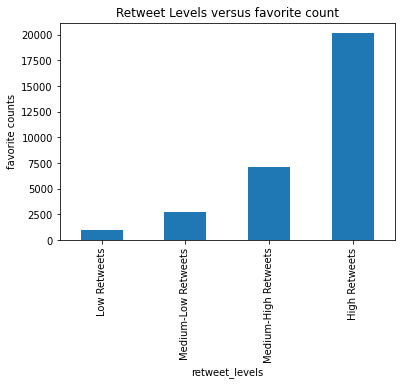

In [6]:
# plotting retweet_levels against favorite_count with pandas
retweet_levels["favorite_count"].plot.bar()
# by default, plot.bar() plots the row index on the x axis
plt.title('Retweet Levels versus favorite count')
plt.ylabel('favorite counts')

Text(0.5, 1.0, 'Retweet Levels & How many times a tweet is favorited')

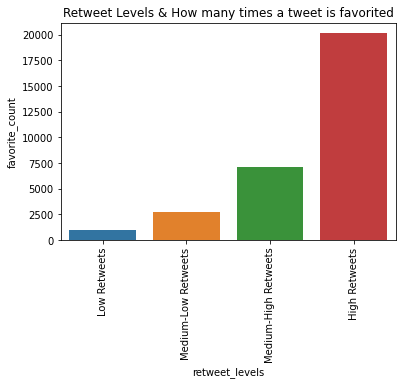

In [7]:
# use seaborn to do the same plot
sb.barplot(x='retweet_levels', y='favorite_count', data=retweet_levels.reset_index())
# retweet_levels is the row index (not a column?)
# reset_index() resets the row index and moves the original row index to a column
plt.xticks(rotation=90)
# because the horizontal titles were pile atop each other and illegible

plt.title('Retweet Levels & How many times a tweet is favorited')

The relationship between how often a post is retweeted and how often a post is favorited is pretty linear from Low Retweets through Medium-High Retweets. But favorite_count jumps up a lot more as we go from MHR to HR.

Is this because most any tweet in High Retweets gets exponentially more favorite_counts than tweets in the other three Retweet categories? Or are perhaps the very most retweeted posts also receive way more favortie_counts? 

Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

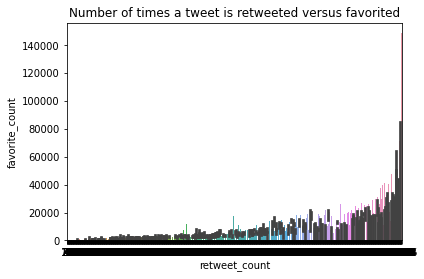

In [14]:
sb.barplot(x="retweet_count", y="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')
#plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], ['0','10K', '2K', '3K', '4K', '5K', '6K', '7K']);
#plt.xticks(rotation=90);


Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

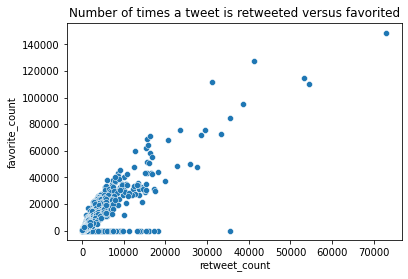

In [31]:
# better to do it as a scatter plot

sb.scatterplot(x="retweet_count", y="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')

Let's zoom in to the area where most of the data is.

We'll start with a fairly wide angle: as high as 8000 favorites and as wide as 3000 retweets

(0.0, 8000.0)

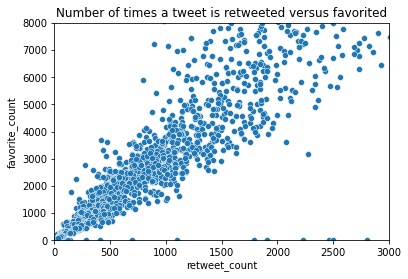

In [34]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')
plt.xlim(0,3000)
plt.ylim(0,8000)

(0.0, 10000.0)

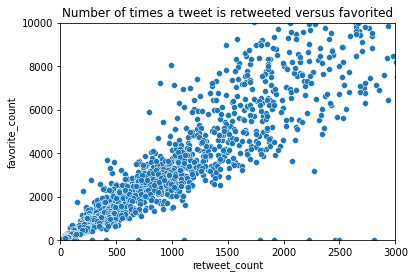

In [13]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')
plt.xlim(0,3000)
plt.ylim(0,10000)

Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

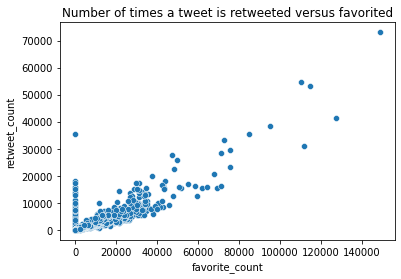

In [75]:
# what if I reverse the x and y axes?

sb.scatterplot(y="retweet_count", x="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')

(0.0, 8000.0)

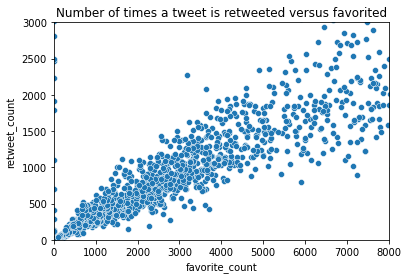

In [77]:
sb.scatterplot(y="retweet_count", x="favorite_count", data= dog)
plt.title('Number of times a tweet is retweeted versus favorited')
plt.ylim(0,3000)
plt.xlim(0,8000)

This graph of retweet_count versus favorite_counts, shows that as retweet_count goes up, favorite_count increases pretty linearly, exept at extremely high retweet counts, which sometimes receive disproportionally more favorites.

This seems to imply that, omitting extreme cases, you can use retweet_count and favorite_count interchangeably as a measure of popularity. It might also imply that retweet_count is a better indicator of popularity, since it doesn't have the extreme spike that favorite_counts does for the most popular. Or perhaps it implies that favorite_counts is a better measure of popularity--perhaps people really do LOVE these few top rated posts more than any others. 

But no, I cannot believe that human interest for any given tweet can truly be so much greater than human interest in other tweets. A more likely explanation is that fewer people retweet (mean is 2467 retweets) than favorite (mean is 7759 favorites), and the most retweeted posts get the most eyes and the most lazy-lonely favorite/letmein/loveme-hungry thumbs.

So I will use retweet_count as the primary measure of a tweet's popularity. That choice automatically cuts out the extremes of favorite_count, and it probably hues closer to real human thought and action. 

Actually, let me examine the relationship between favorite_count and retweet_count mathematically before drawing conclusions about which column's data is the better metric for a tweet's popularity.

In [3]:
# use the correlation function to measure correlation mathematically
# first isolate the two columns we want to comapre
dog_tweet_fave = dog[["retweet_count", "favorite_count"]].copy()
dog_tweet_fave.head(1)

,retweet_count,favorite_count
0,7217,34634


In [5]:
dog_tweet_fave.describe()

,retweet_count,favorite_count
count,1950.000000,1950.000000
mean,2466.838462,7758.502051
std,4290.919517,11579.676953
min,11.000000,0.000000
25%,536.500000,1545.000000
50%,1178.500000,3424.000000
75%,2840.000000,9750.500000
max,73025.000000,148621.000000


In [4]:
dog_tweet_fave.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.858884
favorite_count,0.858884,1.000000


A pearson score greater than .5 or less than .5 is considered a high degree of correlation.

retweet_count and favorite_count have a score of about .86, which is a very high degre of correlation.

I wonder what would happen if we remove those retweet_count values over 2840 (the 75% percentile)

In [5]:
bottom_75_tweets = (dog_tweet_fave[dog_tweet_fave["retweet_count"] <= 2840]).copy()
bottom_75_tweets.describe()

,retweet_count,favorite_count
count,1462.000000,1462.000000
mean,1001.062927,3617.699726
std,723.656041,3306.045985
min,11.000000,0.000000
25%,428.250000,1268.250000
50%,834.500000,2618.000000
75%,1465.750000,4804.000000
max,2831.000000,21201.000000


In [6]:
bottom_75_tweets.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.866659
favorite_count,0.866659,1.000000


Text(0.5, 1.0, 'After removing the top 25% of the tweets')

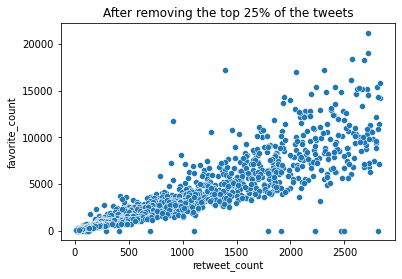

In [50]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= bottom_75_tweets)
plt.title('After removing the top 25% of the tweets')


The pearson score between retweet_count and favorite_count increased from about .86 to about .87 when we removed the top 25% most retweeted tweets.

Let's see what happens when we remove the top 25% most favorited tweets.

In [8]:
bottom_75_fav = (dog_tweet_fave[dog_tweet_fave["favorite_count"] <= 9750.5]).copy()
bottom_75_fav.describe()

,retweet_count,favorite_count
count,1462.000000,1462.000000
mean,1219.796854,3048.589603
std,1793.240085,2479.196651
min,11.000000,0.000000
25%,428.250000,1096.000000
50%,834.500000,2454.000000
75%,1476.750000,4221.750000
max,35562.000000,9749.000000


In [9]:
bottom_75_fav.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.205766
favorite_count,0.205766,1.000000


I don't understand this.

Why should removing the top 25% most favorited tweets completely destroy the correlation between retweet_count and favorite_count? I would think that removing the top 25% of retweets or favorites would remove outliers and thus make retweets and favorites correlate more closely. And that was indeed the case when we removed the top 25% of retweets (the Pearson correlation rose from .86 to .87). 

If you look at the graphs, the points (correlating retweet_count and favorite_count) were more tightly packed and linear as I zoomed in to below 8000 favorite_counts. So how could removing those tweets with favorite_counts greater than 9750.5 destroy the Pearson correlation? It makes no sense to me.

Also, why are the 25% and 50% quartiles in retweet_count identical in both bottom_75_fav (df without the top 25% of favorite_counts) and bottom_75_retweet (df without the top 25% of retweet_counts)? That seems very unlikely to me.

Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

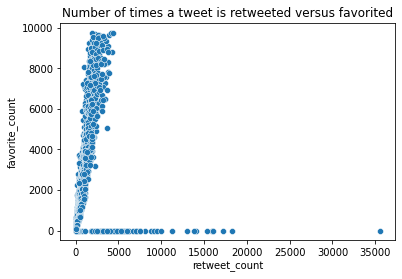

In [10]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= bottom_75_fav)
plt.title('Number of times a tweet is retweeted versus favorited')


Are these outliers along the bottom messing up the correlation in bottom_75_fav?

I'm going to run pair-wise correlation checks on each of the three retweet/favorite data sets.

In [14]:
# making a function to check how each pair of points in the data sets correlate
# first for the full data set of points
c=dog_tweet_fave.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort")

In [15]:
so

retweet_count   favorite_count    0.858884
favorite_count  retweet_count     0.858884
retweet_count   retweet_count     1.000000
favorite_count  favorite_count    1.000000
dtype: float64

In [18]:
# now with the top 25% retweets removed
c=bottom_75_tweets.corr().abs()
s=c.unstack()
so1=s.sort_values(kind="quicksort")

In [19]:
so1

retweet_count   favorite_count    0.866659
favorite_count  retweet_count     0.866659
retweet_count   retweet_count     1.000000
favorite_count  favorite_count    1.000000
dtype: float64

In [22]:
# now with the top 25% favorites removed
c=bottom_75_fav.corr().abs()
s=c.unstack()
so2=s.sort_values(kind="quicksort")

In [23]:
so2

retweet_count   favorite_count    0.205766
favorite_count  retweet_count     0.205766
retweet_count   retweet_count     1.000000
favorite_count  favorite_count    1.000000
dtype: float64

I will see what happens when I remove the bottom row of values where there are many retweets but no favorites.

In [28]:
fav_zero = (dog[dog["favorite_count"]==0]).copy()
fav_zero.head(10)

,Unnamed: 0,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
31,31,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,15880,0,False,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,...,1,labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
65,65,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,70,0,False,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,NaN,NaN,...,1,irish_setter,0.364729,True,golden_retriever,0.202907,True,irish_terrier,0.107473,True
105,105,867072653475098625,RT @rachaeleasler: these @dog_rates hats are 1...,106,0,False,False,{'created_at': 'Thu May 18 01:17:25 +0000 2017...,NaN,NaN,...,1,blenheim_spaniel,0.352946,True,papillon,0.211766,True,pekinese,0.112952,True
128,128,860924035999428608,RT @tallylott: h*ckin adorable promposal. 13/1...,697,0,False,False,{'created_at': 'Sat May 06 17:49:42 +0000 2017...,NaN,NaN,...,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
163,163,851861385021730816,RT @eddie_coe98: Thanks @dog_rates completed m...,19,0,False,False,{'created_at': 'Sat Apr 01 21:42:03 +0000 2017...,NaN,NaN,...,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
178,178,847971574464610304,RT @basic_vacek_: I love my new mug easy 13/10...,411,0,False,False,{'created_at': 'Sat Apr 01 00:36:55 +0000 2017...,NaN,NaN,...,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
205,205,841833993020538882,RT @dog_rates: This is Ken. His cheeks are mag...,14039,0,False,False,{'created_at': 'Fri Jan 06 17:33:29 +0000 2017...,NaN,NaN,...,1,ice_bear,0.336200,False,samoyed,0.201358,True,eskimo_dog,0.186789,True
216,216,839290600511926273,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,137,0,False,False,{'created_at': 'Wed Mar 08 01:41:24 +0000 2017...,NaN,NaN,...,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
219,219,838916489579200512,RT @KibaDva: I collected all the good dogs!! 1...,31,0,False,False,{'created_at': 'Tue Mar 07 00:15:46 +0000 2017...,NaN,NaN,...,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
251,251,832769181346996225,RT @EmilieGambril: 12/10 h*cking excited about...,38,0,False,False,{'created_at': 'Sat Feb 18 01:39:12 +0000 2017...,NaN,NaN,...,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False


In [26]:
# how many of the rows have a favorite count of zero?
fav_zero.shape[0]

70

In [27]:
# I wonder if any rows have a retweet count of zero

retweet_zero = (dog[dog["retweet_count"]==0]).copy()

retweet_zero.shape[0]

0

In [34]:
# removing the rows with zero favorite counts
dog_pared = (dog[dog["favorite_count"] > 0]).copy()
dog_pared[dog_pared["favorite_count"]==0]

,Unnamed: 0,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
# get the a version of dog_pared that has only retweet and favorite count columns
dp_retw_fav = dog_pared[["retweet_count", "favorite_count"]].copy()

In [38]:
# run the correlation again

dp_retw_fav.corr(method="pearson")

,retweet_count,favorite_count
retweet_count,1.000000,0.926989
favorite_count,0.926989,1.000000


That's a very high correlation, and, at about .93, about .07 above the Pearson correlation before removing the 0-value favorite_counts. Now I will try removing the top 25% most retweeted or favorited again.

In [39]:
dog_pared.describe()

,Unnamed: 0,id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1880.000000,1.880000e+03,1880.000000,1880.000000,2.300000e+01,2.300000e+01,0.0,0.0,1880.000000,1880.000000,1880.000000,1880.000000,1.880000e+03,1.880000e+03
mean,992.850000,7.373941e+17,2343.935106,8047.382447,6.978112e+17,4.196984e+09,NaN,NaN,12.296809,10.462234,1.207979,0.595169,1.338841e-01,6.007593e-02
std,562.290265,6.777818e+16,4174.622994,11694.369572,4.359384e+16,0.000000e+00,NaN,NaN,42.485576,6.513151,0.565874,0.272846,1.005594e-01,5.102636e-02
min,0.000000,6.660209e+17,11.000000,67.000000,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,517.750000,6.765996e+17,530.750000,1795.250000,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,1.000000,0.360361,5.378615e-02,1.592452e-02
50%,1007.500000,7.099100e+17,1142.000000,3634.500000,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1.000000,0.588030,1.168935e-01,4.898335e-02
75%,1477.250000,7.906112e+17,2681.000000,10073.250000,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,1.000000,0.850559,1.942180e-01,9.198323e-02
max,1949.000000,8.924206e+17,73025.000000,148621.000000,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [43]:
# first let's remove the top 25% most retweeted

dp_75_retw = (dp_retw_fav[dp_retw_fav["retweet_count"] < 2681]).copy()

In [44]:
dp_75_retw.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.879943
favorite_count,0.879943,1.000000


That's actually a little worse of a fit.

Let's look at graphs of both dog_pared and dp_75_retw

Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

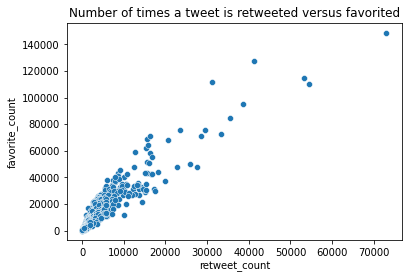

In [46]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= dog_pared)
plt.title('Number of times a tweet is retweeted versus favorited')

Text(0.5, 1.0, 'Number of times a tweet is retweeted versus favorited')

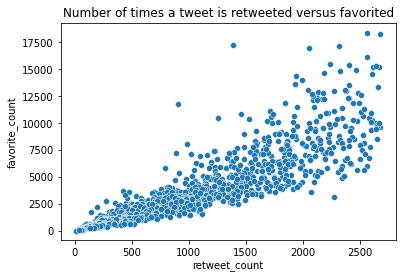

In [45]:
sb.scatterplot(x="retweet_count", y="favorite_count", data= dp_75_retw)
plt.title('Number of times a tweet is retweeted versus favorited')

In [48]:
# what about removing the top 25% most favorited?

dp_75_fav = (dp_retw_fav[dp_retw_fav["favorite_count"] < 10073.25]).copy()

In [49]:
dp_75_fav.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.901287
favorite_count,0.901287,1.000000


This indicates that the extremely low correlation that resulted from removing the top 25% of favorite counts from the original data set was due to the 70 tweets that had zero favorite counts.

I was not able to find a pattern explaining why some tweets have zero favorites.

I want to investigate which rows have high retweet counts but no favorite counts.


In [17]:
lonely_retweets = (dog[(dog["favorite_count"] == 0) & (dog["retweet_count"] >= 1000).copy()


In [18]:
lonely_retweets.head()

,Unnamed: 0,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
31,31,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,15880,0,False,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,...,1,labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
205,205,841833993020538882,RT @dog_rates: This is Ken. His cheeks are mag...,14039,0,False,False,{'created_at': 'Fri Jan 06 17:33:29 +0000 2017...,NaN,NaN,...,1,ice_bear,0.336200,False,samoyed,0.201358,True,eskimo_dog,0.186789,True
257,257,832215726631055365,RT @dog_rates: This is Moreton. He's the Good ...,8854,0,False,False,{'created_at': 'Tue Nov 01 03:00:09 +0000 2016...,NaN,NaN,...,1,afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
258,258,832040443403784192,RT @dog_rates: This is Klein. These pics were ...,9105,0,False,False,{'created_at': 'Sun Aug 28 16:51:16 +0000 2016...,NaN,NaN,...,1,miniature_pinscher,0.796313,True,chihuahua,0.155413,True,staffordshire_bullterrier,0.030943,True
272,272,829878982036299777,RT @dog_rates: This is Loki. He smiles like El...,4761,0,False,False,{'created_at': 'Thu Feb 02 01:01:21 +0000 2017...,NaN,NaN,...,1,golden_retriever,0.617389,True,labrador_retriever,0.337053,True,tennis_ball,0.008554,False


In [20]:
dog.head()

,Unnamed: 0,id,full_text,retweet_count,favorite_count,favorited,retweeted,retweeted_status,in_reply_to_status_id,in_reply_to_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,7217,34634,False,False,NaN,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,This is Tilly. She's just checking pup on you....,5413,30006,False,False,NaN,NaN,NaN,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,3576,22592,False,False,NaN,NaN,NaN,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,This is Darla. She commenced a snooze mid meal...,7438,37891,False,False,NaN,NaN,NaN,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,This is Franklin. He would like you to stop ca...,7982,36179,False,False,NaN,NaN,NaN,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [19]:
lonely_retweets.describe()

,Unnamed: 0,id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,57.000000,5.700000e+01,57.000000,57.0,0.0,0.0,5.700000e+01,5.700000e+01,57.000000,57.0,57.000000,57.000000,57.000000,57.000000
mean,462.491228,7.993266e+17,7046.614035,0.0,NaN,NaN,7.549772e+17,4.196984e+09,11.842105,10.0,1.245614,0.591192,0.157004,0.067941
std,142.647808,2.450536e+16,5740.139168,0.0,NaN,NaN,5.213980e+16,0.000000e+00,1.048630,0.0,0.662266,0.237128,0.104819,0.055598
min,31.000000,7.523094e+17,1103.000000,0.0,NaN,NaN,6.675094e+17,4.196984e+09,10.000000,10.0,1.000000,0.090341,0.001186,0.000428
25%,360.000000,7.833475e+17,3314.000000,0.0,NaN,NaN,7.076109e+17,4.196984e+09,11.000000,10.0,1.000000,0.383223,0.061604,0.017492
50%,463.000000,7.986946e+17,5258.000000,0.0,NaN,NaN,7.750851e+17,4.196984e+09,12.000000,10.0,1.000000,0.586937,0.159509,0.050528
75%,559.000000,8.168290e+17,8108.000000,0.0,NaN,NaN,7.916723e+17,4.196984e+09,13.000000,10.0,1.000000,0.777468,0.227150,0.110592
max,745.000000,8.853116e+17,35562.000000,0.0,NaN,NaN,8.305833e+17,4.196984e+09,14.000000,10.0,4.000000,0.997310,0.398260,0.223263


I still don't know why some tweets have no favorites.

I think I have to stop my investigations of the relationship between retweet_count and favorite_count now.

We can conclude that if we use the whole data set, the correlation between the two is very strong (about 86%), and if we remove those tweets that have an even higher correlation (about 93%).

I'm not sure what to make of the zero-favorited tweets. Does there existence argue for or against the primacy of retweet_count over favorite_count as the best metric for rating a tweet's popularity? I don't know, but it is only 70 tweets. Perhaps the best metric would be to remove those 70 zero-favorites tweets, making retweet_count and favorite_count almost interchangeable. 

I already did all the below work, and since this project should've been finished long ago, I will not redo it. I will simply note here and in the final report that there seems to be a good argument for removing the 70 zero-favorited tweets when choosing a metric for measuring dog popularity. 

#### Assessing popularity of tweets about different dog stages

I assumed tweets about puppies would be the most popular.

My results below were not so straight forward.

In [7]:
pd.set_option('display.max_rows', 200)
dog["p1"].value_counts(sort=True, ascending=False)

golden_retriever                  144
labrador_retriever                 93
pembroke                           83
chihuahua                          79
pug                                54
chow                               41
samoyed                            40
pomeranian                         35
toy_poodle                         34
malamute                           29
cocker_spaniel                     28
french_bulldog                     25
miniature_pinscher                 23
chesapeake_bay_retriever           22
seat_belt                          21
cardigan                           19
siberian_husky                     19
beagle                             18
teddy                              18
staffordshire_bullterrier          18
german_shepherd                    18
eskimo_dog                         18
shih-tzu                           17
maltese_dog                        17
lakeland_terrier                   17
rottweiler                         17
web_site    

In [35]:
dog.groupby("dog_stage").mean()

,Unnamed: 0,id,retweet_count,favorite_count,favorited,retweeted,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
dog_stage,,,,,,,,,,,,,,,,,,,
doggo,465.953846,7.998373e+17,6737.800000,17208.892308,0.0,0.0,NaN,NaN,8.216566e+17,4.196984e+09,11.815385,10.0,1.323077,0.576175,0.784615,0.159244,0.784615,0.059542,0.707692
"doggo, pupper",606.400000,7.758346e+17,7464.200000,14358.200000,0.0,0.0,7.331095e+17,4.196984e+09,7.331095e+17,4.196984e+09,11.800000,10.0,1.200000,0.840053,1.000000,0.072186,1.000000,0.029641,0.600000
floofer,699.857143,7.665514e+17,4100.857143,11510.428571,0.0,0.0,NaN,NaN,NaN,NaN,12.000000,10.0,1.142857,0.609204,1.000000,0.155319,1.000000,0.047997,0.857143
pupper,1052.935961,7.225366e+17,2047.546798,6128.379310,0.0,0.0,6.869622e+17,4.196984e+09,7.884562e+17,2.517488e+09,10.753695,10.0,1.261084,0.613234,0.699507,0.129120,0.729064,0.055850,0.699507
puppo,411.000000,8.112750e+17,5908.208333,20174.708333,0.0,0.0,NaN,NaN,7.909461e+17,4.196984e+09,12.041667,10.0,1.416667,0.704691,0.833333,0.139217,0.916667,0.045689,0.958333


In [36]:
# combine pupper and puppo rows
# first make the df more manageable and remove the na dog_stage values
dogs_and_pups = dog[["dog_stage", "retweet_count", "favorite_count"]].dropna()
dogs_and_pups.head()

,dog_stage,retweet_count,favorite_count
9,doggo,6276,28638
12,puppo,8595,43111
14,puppo,1934,13662
27,pupper,2714,18994
37,doggo,2567,18374


In [37]:
# make a new column called dog_stage_2
dogs_and_pups["dog_stage_2"] = dogs_and_pups["dog_stage"].copy()

# select the rows with either puppo or pupper
puppy_mask = dogs_and_pups["dog_stage_2"].isin(["puppo", "pupper"])

# change the rows in puppy_mask to puppy
dogs_and_pups.loc[puppy_mask, "dog_stage_2"] = "puppy"

dogs_and_pups.loc[puppy_mask, ["dog_stage", "dog_stage_2"]]

,dog_stage,dog_stage_2
12,puppo,puppy
14,puppo,puppy
27,pupper,puppy
43,pupper,puppy
61,puppo,puppy
...,...,...
1637,pupper,puppy
1643,pupper,puppy
1650,pupper,puppy
1656,pupper,puppy


In [38]:
dogs_and_pups.head()

,dog_stage,retweet_count,favorite_count,dog_stage_2
9,doggo,6276,28638,doggo
12,puppo,8595,43111,puppy
14,puppo,1934,13662,puppy
27,pupper,2714,18994,puppy
37,doggo,2567,18374,doggo


In [39]:
dogpup_thin = dogs_and_pups.drop("dog_stage", 1)
dogpup_thin.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count,dog_stage_2
9,6276,28638,doggo
12,8595,43111,puppy
14,1934,13662,puppy
27,2714,18994,puppy
37,2567,18374,doggo


In [40]:
dogpup_thin["dog_stage_2"].value_counts()

puppy            227
doggo             65
floofer            7
doggo, pupper      5
Name: dog_stage_2, dtype: int64

In [41]:
dogpup_thin.groupby("dog_stage_2").sum()

,retweet_count,favorite_count
dog_stage_2,,
doggo,437957,1118578
"doggo, pupper",37321,71791
floofer,28706,80573
puppy,557449,1728254


In [42]:
dogpup_thin.groupby("dog_stage_2").mean()

,retweet_count,favorite_count
dog_stage_2,,
doggo,6737.800000,17208.892308
"doggo, pupper",7464.200000,14358.200000
floofer,4100.857143,11510.428571
puppy,2455.722467,7613.453744


I would've thought puppies would get the most retweets and favorites.

But doggos had a much higher average retweet rate and a much higher average favorite rate than puppies.

And yet people love puppies the most, because puppies are adorable, whereas dogs are merely cute.

Surely some other factor is at work here, but I don't what it is.

Do people respect dogs? Work dogs work, but people don't tweet about that. They tweet about dogs looking silly. Why aren't dogs taken more seriously? They evolved with us, protecting us from wilder beasts as we huddled round our campfires. Why have they been reduced to this?

Perhaps because we, their owners, have been reduced to living only tangentally to the animal within us. As we've domesticated ourselves further and further, we've had to domesticate them further and further, so that they could continue to make sense to and have meaning to us.

Within this great domestication, we've also heaped up more and more power and more and more ability to destroy. But the higher and higher walls around the city make most of us more and more free to become less and less good at violence and other rough matters.

The wild days were brutal. These mild ones are nicer. And they allow one to grow intellectually, emotionally and spiritually in ways that short survival-centered lives didn't have the space for. Of course those lives had another sort of i/e/s growth embedded into them; one that we cannot really replicate in this setting. 

Hard to say, but let's see what happens when we throw out the very most tweeted posts.


In [43]:
# examine retweet_count from highest to lowest
dogpup_thin.sort_values("retweet_count", ascending=False).head(15)

,retweet_count,favorite_count,dog_stage_2
813,73025,148621,doggo
845,54503,110040,doggo
315,41209,127244,puppy
344,35562,84689,doggo
341,35562,0,doggo
108,31148,111567,puppy
482,22706,48135,doggo
343,18284,44056,doggo
342,18284,0,doggo
301,16841,55268,puppy


In [44]:
# There's only a few retweet_counts over 20000
# we'll remove those and see how the averages are effected
# first we create a series of True / False info on all the retweet_count values
# (True if retweet_count > 20000; false otherwise)
dp_mask1 = dogpup_thin["retweet_count"] > 20000
# the index of that series includes only the True values
# we pair that index with .loc to fet all the rows where it is True
# that retweet_count is greater than 20000
dpcut1 = dogpup_thin.drop(dogpup_thin.loc[dp_mask1, "retweet_count"].index)
dpcut1.head()


,retweet_count,favorite_count,dog_stage_2
9,6276,28638,doggo
12,8595,43111,puppy
14,1934,13662,puppy
27,2714,18994,puppy
37,2567,18374,doggo


In [45]:
# another method to drop the rows with retweets over 20000
dp_mask2 = dogpup_thin["retweet_count"] <=20000
dpcut2 = dogpup_thin.loc[dp_mask2].copy()

#per the technical mentor:
#It is important to use .copy() 
# Otherwise dpcut2 will be a "slice" of dogpup_thin 
# It will still be connected to dogpup_thin 
#and any edits to dpcut_loc will be reflected in dogpup_thin too.
dpcut2.head()

,retweet_count,favorite_count,dog_stage_2
9,6276,28638,doggo
12,8595,43111,puppy
14,1934,13662,puppy
27,2714,18994,puppy
37,2567,18374,doggo


In [46]:
dpcut2.groupby("dog_stage_2").mean()

,retweet_count,favorite_count
dog_stage_2,,
doggo,3609.983333,12118.216667
"doggo, pupper",7464.200000,14358.200000
floofer,4100.857143,11510.428571
puppy,2155.964444,6619.746667


Now doggo has an average of about 1.67 times as many retweets per post as puppy. That's better than before we threw out the highest values. Then doggo's average retweet was 2.74 times more than puppy's.

Let's look at the stats for this new dataframe

In [47]:
dpcut2.describe()

,retweet_count,favorite_count
count,297.000000,297.000000
mean,2584.909091,7976.094276
std,3250.459595,9067.819775
min,70.000000,0.000000
25%,707.000000,2303.000000
50%,1441.000000,4301.000000
75%,3046.000000,10491.000000
max,18284.000000,55268.000000


The mean is still only 2584, and the 75% is not much more (3046). But the max is way above that (18284)

Let's look at the count of total tweets for the dog stages on both the original and the trimmed dataframes.

In [48]:
dogpup_thin["dog_stage_2"].value_counts()

puppy            227
doggo             65
floofer            7
doggo, pupper      5
Name: dog_stage_2, dtype: int64

In [49]:
dpcut2["dog_stage_2"].value_counts()

puppy            225
doggo             60
floofer            7
doggo, pupper      5
Name: dog_stage_2, dtype: int64

I was going to hypothesize that doggo had way more tweets than puppy and certain percentage of the time people just go nuts for a tweet (it catches on), so the reason that doggo had such a higher retweet average was because it had so many more opportunities to catch on and garner posts with run-away retweet counts.

But puppy has way more posts than doggo.

Which undermines my theory.

Let's drop the posts with retweet counts higher than the 75% point (ie: retweet counts greater than 3046). To see what happens.

In [50]:
dp_mask3 = dogpup_thin["retweet_count"] <= 3046
dpcut3 = dogpup_thin.loc[dp_mask3].copy()
dpcut3.groupby("dog_stage_2").mean()

,retweet_count,favorite_count
dog_stage_2,,
doggo,1830.138889,8210.305556
"doggo, pupper",1760.333333,7034.666667
floofer,1548.500000,5398.500000
puppy,1081.377778,3895.883333


In [51]:
# hmm, doggos still have quite a bit higher retweet rate than puppies.
# let's see where total counts are at with this last group
dpcut3["dog_stage_2"].value_counts()

puppy            180
doggo             36
floofer            4
doggo, pupper      3
Name: dog_stage_2, dtype: int64

Perhaps more posts mean more chances to be largely ignored? I don't know what to make of the fact that the puppies were retweeted less than the doggos.

Here's a theory: There are almost five times as many puppy posts as doggo posts. When the moderators bother to write about a doggo, it is because that post has some exceptional charm. Therefore, on average, the doggo posts receive more retweets per post than the puppy posts.



In [52]:
dpcut3.groupby("dog_stage_2").sum()

,retweet_count,favorite_count
dog_stage_2,,
doggo,65885,295571
"doggo, pupper",5281,21104
floofer,6194,21594
puppy,194648,701259


Using dpcut3 (the version of the data without the extreme high values that were present in the original dataframe -- values that only reflected a very small minority of the tweets), let's look at compare total tweets, total retweet_count and mean retweet_count for doggo and puppy.

doggo has 36 total tweets, 65885 total retweets, and a mean retweet_count of 1830.

puppy has 180 total tweets, 194648 total retweets, and a mean retweet_count of 1081

180/36 = 5

puppy has five times as many total tweets as doggo.

194648/65885 = 2.95

puppy has three times as many total retweets as doggo.

3 times as many total retweets / 5 times as many total tweets = .6

versus

a mean retweet_count of 1081 / 1830 = .597 = .6

Why? Why is the total ratio of retweets to tweets for puppy/doggo almost identical with the ratio of the mean retweet_count of puppy/doggo? That's not guaranteed by the math, is it? I guess it is. 

In any case, we have no reason to abandon the hypothesis stated in the last blurb. Maybe the moderators would generally rather talk about puppies and are only moved to speak of a doggo when the post is really exceptional.



In [53]:
dpcut3.groupby("dog_stage_2").describe().stack(level=0)[['25%', '50%', '75%', 'mean']]

25%     50%       75%         mean
dog_stage_2                                                         
doggo         favorite_count  5338.25  7323.5  10326.00  8210.305556
              retweet_count   1482.00  1767.5   2253.75  1830.138889
doggo, pupper favorite_count  6256.50  6779.0   7685.00  7034.666667
              retweet_count   1574.50  1813.0   1972.50  1760.333333
floofer       favorite_count  3117.75  4366.0   6646.75  5398.500000
              retweet_count    827.50  1538.5   2259.50  1548.500000
puppy         favorite_count  1947.00  2675.0   4651.75  3895.883333
              retweet_count    535.50   885.0   1401.50  1081.377778

For the tweets with the lowest 25% of retweets, the doggo retweet is almost five times as high as the puppy retweet count. At the 50% mark, the doggo retweet is now only about twice the puppy. And at the 75% mark, the doggo retweet count is less than twice the puppy retweet count.

What does this mean in terms of the overall advantage to doggo?

Does it confirm my suspicion that the puppy retweet count is brought down by many puppy posts that are charming, but not amazingly so? Is this phenomenon caused by the human preference for speaking of puppies that is occassionally trumped by a truly wonderous post? 

Remember: Not all posts get descriptions, so not all posts speak of puppies, doggos, fluffers, or any of these attempts to turn leaving creatures with souls (as with all mortals) in some way and degree torn and assorted other moral complexities into snuggly kitch for mindless "awww"ing consumption.

#### Assessing the popularity of tweets about different breeds

In [54]:
# dataframe of the first-guessed dog breeds along with favorite
# count and retweet count
dog1 = pd.DataFrame(dog.groupby('p1')['retweet_count', 'favorite_count'].mean()).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
dog1.head()

,p1,retweet_count,favorite_count
0,acorn_squash,1667.50,6993.00
1,afghan_hound,5907.25,11310.75
2,african_crocodile,218.00,841.00
3,african_grey,1059.00,4611.00
4,african_hunting_dog,1000.00,1497.00


In [56]:
# dataframe of first-guessed dog breeds ordered
# from most to least common in dog df, along with the number 
# of instances of each breed within dog df
dog2 = pd.DataFrame(dog.groupby('p1').size()).reset_index().rename(columns={0:'count'})

In [57]:
dog2.head()

,p1,count
0,acorn_squash,2
1,afghan_hound,4
2,african_crocodile,1
3,african_grey,1
4,african_hunting_dog,1


In [65]:
# put the two dataframes together
# and order them from most commonly guessed dog breed
# to least commonly guessed
breeds = dog1.merge(dog2).sort_values('count', ascending=False)

In [66]:
breeds.head()

,p1,retweet_count,favorite_count,count
137,golden_retriever,3316.916667,10307.638889,144
183,labrador_retriever,3379.053763,9872.301075,93
244,pembroke,2693.819277,10106.060241,83
76,chihuahua,2606.987342,7750.645570,79
257,pug,1673.555556,5039.777778,54


In [67]:
breeds = breeds.reset_index(drop=True)
breeds.head()

,p1,retweet_count,favorite_count,count
0,golden_retriever,3316.916667,10307.638889,144
1,labrador_retriever,3379.053763,9872.301075,93
2,pembroke,2693.819277,10106.060241,83
3,chihuahua,2606.987342,7750.645570,79
4,pug,1673.555556,5039.777778,54


In [68]:
breeds.head(60)

,p1,retweet_count,favorite_count,count
0,golden_retriever,3316.916667,10307.638889,144
1,labrador_retriever,3379.053763,9872.301075,93
2,pembroke,2693.819277,10106.060241,83
3,chihuahua,2606.987342,7750.645570,79
4,pug,1673.555556,5039.777778,54
5,chow,2635.804878,8641.317073,41
6,samoyed,3858.550000,10342.675000,40
7,pomeranian,2507.028571,7572.628571,35
8,toy_poodle,2222.294118,6038.941176,34
9,malamute,2256.620690,7667.275862,29


In [61]:
list(breeds.columns)

['p1', 'retweet_count', 'favorite_count', 'count']

Let's compare retweet levels for the fifteen most posted dog breeds.

In [69]:
# first we'll shorten the dataframe
seventeen = breeds.head(17)
seventeen.head(17)

,p1,retweet_count,favorite_count,count
0,golden_retriever,3316.916667,10307.638889,144
1,labrador_retriever,3379.053763,9872.301075,93
2,pembroke,2693.819277,10106.060241,83
3,chihuahua,2606.987342,7750.645570,79
4,pug,1673.555556,5039.777778,54
5,chow,2635.804878,8641.317073,41
6,samoyed,3858.550000,10342.675000,40
7,pomeranian,2507.028571,7572.628571,35
8,toy_poodle,2222.294118,6038.941176,34
9,malamute,2256.620690,7667.275862,29


In [70]:
# drop the non-dogs
fifteen_fave = seventeen.drop([14,16])
fifteen_fave.head(15)

,p1,retweet_count,favorite_count,count
0,golden_retriever,3316.916667,10307.638889,144
1,labrador_retriever,3379.053763,9872.301075,93
2,pembroke,2693.819277,10106.060241,83
3,chihuahua,2606.987342,7750.645570,79
4,pug,1673.555556,5039.777778,54
5,chow,2635.804878,8641.317073,41
6,samoyed,3858.550000,10342.675000,40
7,pomeranian,2507.028571,7572.628571,35
8,toy_poodle,2222.294118,6038.941176,34
9,malamute,2256.620690,7667.275862,29


<AxesSubplot:>

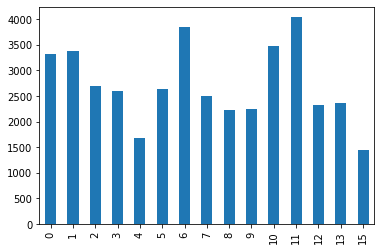

In [72]:
fifteen_fave["retweet_count"].plot.bar()


In [73]:
# make fifteen_fave easier to plot by making the dog names the indexes
fifteen_f2 = fifteen_fave.set_index("p1")
fifteen_f2.head()

,retweet_count,favorite_count,count
p1,,,
golden_retriever,3316.916667,10307.638889,144
labrador_retriever,3379.053763,9872.301075,93
pembroke,2693.819277,10106.060241,83
chihuahua,2606.987342,7750.645570,79
pug,1673.555556,5039.777778,54


Text(0.5, 1.0, 'How many times the fifteen most retweeted dogs were retweeted')

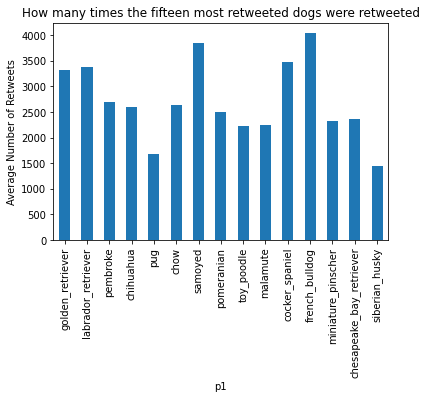

In [74]:
fifteen_f2["retweet_count"].plot.bar()
plt.ylabel("Average Number of Retweets")
plt.title("How many times the fifteen most retweeted dogs were retweeted")

In [28]:
fifteen_f2.head(5)

,retweet_count,favorite_count,count
p1,,,
golden_retriever,3316.916667,10307.638889,144
labrador_retriever,3379.053763,9872.301075,93
pembroke,2693.819277,10106.060241,83
chihuahua,2606.987342,7750.645570,79
pug,1673.555556,5039.777778,54


Unnamed: 0  favorited  full_text  tweet_id  \
retweet_count favorite_count                                               
11            67                       1          1          1         1   
19            0                        1          1          1         1   
              93                       1          1          1         1   
26            0                        1          1          1         1   
29            0                        1          1          1         1   

                              retweeted  Unnamed: 0.1  retweeted_status_id  \
retweet_count favorite_count                                                 
11            67                      1             1                    0   
19            0                       1             1                    1   
              93                      1             1                    0   
26            0                       1             1                    1   
29            0                       1             1                    1   

                              retweeted_status_user_id  \
retweet_count favorite_count                             
11            67                                     0   
19            0                                      1   
              93                                     0   
26            0                                      1   
29            0                                      1   

                              retweeted_status_timestamp  expanded_urls  \
retweet_count favorite_count                                              
11            67                                       0              1   
19            0                                        1              1   
              93                                       0              1   
26            0                                        1              1   
29            0                                        1              1   

                               ...    img_num  p1  p1_conf  p1_dog  p2  \
retweet_count favorite_count   ...                                       
11            67               ...          1   1        1       1   1   
19            0                ...          1   1        1       1   1   
              93               ...          1   1        1       1   1   
26            0                ...          1   1        1       1   1   
29            0                ...          1   1        1       1   1   

                              p2_conf  p2_dog  p3  p3_conf  p3_dog  
retweet_count favorite_count                                        
11            67                    1       1   1        1       1  
19            0                     1       1   1        1       1  
              93                    1       1   1        1       1  
26            0                     1       1   1        1       1  
29            0                     1       1   1        1       1  

[5 rows x 25 columns]